# Laboratorio 3: Análisis de Datos con Python

## Parte 1: Numpy:
**1. ¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?**


In [131]:
import numpy as np

In [132]:
arreglo= np.ones(1000, dtype=bool)
tamaño = arreglo.nbytes

print("tamaño en bytes:", tamaño)

tamaño en bytes: 1000


**2. Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.**

In [133]:
arreglo = np.arange(100, 0, -2)
arreglo[-10: ]

array([20, 18, 16, 14, 12, 10,  8,  6,  4,  2])

**3. Dado el array...**


In [134]:
array = np.array([[2,4,5,6],
         [0,3,7,4],
         [8,8,5,2],
         [1,5,6,1]])

In [135]:
# todos los elementos de la fila 1
array[1,:]

array([0, 3, 7, 4])

In [136]:
#primer y segundo subarray
array[::2, 0:3:2]

array([[2, 5],
       [8, 5]])

**4. Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9],obtenga la media aritmética de la diferencia (a-b).**

In [137]:
a = np.array([1, 4, 2, 7])
b = np.array([1, 3, 2, 9])

In [138]:
diferencia = np.subtract(a,b)
diferencia

array([ 0,  1,  0, -2])

In [139]:
print(f'Media aritmetica de la diferencia a-b = {np.mean(diferencia)}')

Media aritmetica de la diferencia a-b = -0.25


**5. Tengo valores de cordenadas (x, y) en las columnas del array
    1.33 4.5
    30.0 10.7
    70.2 0.5**

   **Agregue a este array las coordenadas (37.1, -3.6). Muestre en pantalla las dimensiones del nuevo array.**

In [140]:
coordenadas = np.array([[1.33, 4.5], [30.0, 10.7], [70.2, 0.5]])
coordenadas

array([[ 1.33,  4.5 ],
       [30.  , 10.7 ],
       [70.2 ,  0.5 ]])

In [141]:
coordenadas.ndim

2

In [142]:
a = np.array([37.1, -3.6])
a

array([37.1, -3.6])

In [143]:
combinacion = np.vstack((coordenadas, a))
combinacion

array([[ 1.33,  4.5 ],
       [30.  , 10.7 ],
       [70.2 ,  0.5 ],
       [37.1 , -3.6 ]])

**6. Copie el array del ejercicio anterior. Traspóngalo (.Agregue ahora dos nuevos pares de coordenadas: (10.8,3.0) y (35.8, 12.0).**

In [144]:
trans = coordenadas.T
trans

array([[ 1.33, 30.  , 70.2 ],
       [ 4.5 , 10.7 ,  0.5 ]])

In [145]:
nuevo = np.array([[10.8,3.0], [35.8, 12.0]])
nuevo.T

array([[10.8, 35.8],
       [ 3. , 12. ]])

In [146]:
np.column_stack((trans,nuevo.T))

array([[ 1.33, 30.  , 70.2 , 10.8 , 35.8 ],
       [ 4.5 , 10.7 ,  0.5 ,  3.  , 12.  ]])

## Parte 2: Exploración y Minería de Datos:

Con el dataset nucleospoblacion.csv adjunto al laboratorio, luego responda las siguientes preguntas usando pandas y matplotlib.

**1. ¿Cuántos Municipios tienen más de 100000 habitantes?.**

In [147]:
import pandas as pd
dataframe = pd.read_csv('NucleosPoblacion.csv')
dataframe

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873
...,...,...,...,...,...,...,...,...,...,...
847,847,848,Infante Juan Manuel,14192.0,30030,Murcia,30,Murcia,-1.124304,37.979033
848,848,849,Santa Maria de Gracia,13349.0,30030,Murcia,30,Murcia,-1.202069,37.984024
849,849,850,Vista Alegre,15208.0,30030,Murcia,30,Murcia,-1.130564,37.995715
850,850,851,Poligono Sta M de Benquerencia,19177.0,45168,Toledo,45,Toledo,-3.948364,39.866699


In [148]:
muni = (dataframe['Poblacion'] > 100000).sum()
muni
#62 municipios

62

**2. Realice una gráfica de barras sobre la polbación de cada ciudad, ordenela de menor a mayo y responda:**

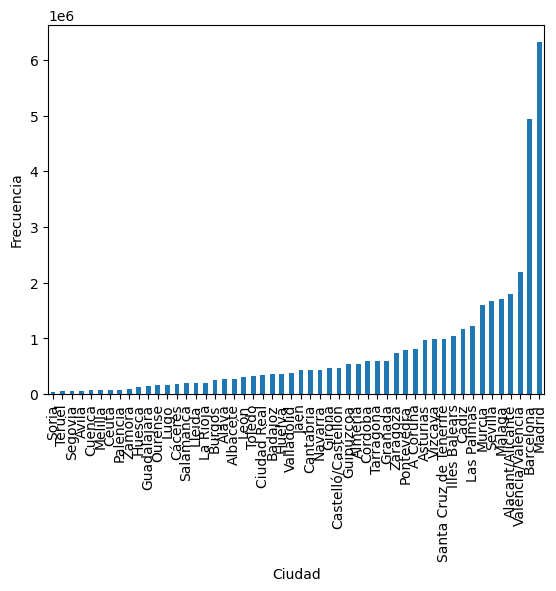

In [228]:
import matplotlib.pyplot as plt

pob_mun =dataframe.groupby('Provincia')['Poblacion'].sum().reset_index()
pob_mun = pob_mun.sort_values(by='Poblacion', ascending=True)
grafico = pob_mun.plot(kind='bar', x='Provincia', y='Poblacion', legend=None)

# Añadir etiquetas al gráfico
grafico.set_xlabel('Ciudad')
grafico.set_ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

**a. ¿Cuál es la segunda ciudad más poblada?**

La segunda ciudad mas poblada es **Barcelona**

**b. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?** 

In [202]:
pob_mun =dataframe.groupby('Provincia')['Poblacion'].sum().reset_index()

pob_mun = pob_mun.sort_values(by='Poblacion', ascending=False)
pos_granada = (pob_mun.index[pob_mun['Provincia'] == 'Granada'][0])
pos_granada

17

Ocupa el puesto **17**

**3. ¿Cuántos municipios de Navarra tienen más de 5000 habitantes?.**

In [184]:
navarra = dataframe[dataframe['Provincia']=='Navarra']
(navarra['Poblacion']>5000).count()

11



**4. ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.**

In [189]:
norte = dataframe.loc[dataframe['Y'].idxmax()] 

print("El municipio situado más al norte es:", norte['Municipio'])
print("Provincia:", norte['Provincia'])
print("Población:", norte['Poblacion'])

El municipio situado más al norte es: Viveiro
Provincia: Lugo
Población: 16211.0


**5. Obtenga la media, mediana, desviación estándar, valormáximo y valor mínimo de la población de los municipiosde la provincia de Granada.**

In [ ]:
granada = dataframe.loc[dataframe['Provincia']== 'Granada']
granada

In [156]:
media = granada['Poblacion'].mean()
mediana =  granada['Poblacion'].median()
des_est =  granada['Poblacion'].std()
max_val = granada['Poblacion'].max()
min_val = granada['Poblacion'].min()

print(f'La media es de :{media}')
print(f'La mediana es de :{mediana}')
print(f'La desviación estandar es de:{des_est}')
print(f'La menor poblacion es de :{min_val}')
print(f'La mayor poblacion es de :{max_val}')

La media es de :30217.85
La mediana es de :17526.0
La desviación estandar es de:50355.49171459277
La menor poblacion es de :10386.0
La mayor poblacion es de :239154.0


**6. Realice un histograma con la población de los Municipios para cada una de las provincias.**

In [ ]:
pob_prov =dataframe[['Provincia','Municipio','Poblacion']]
pob_prov

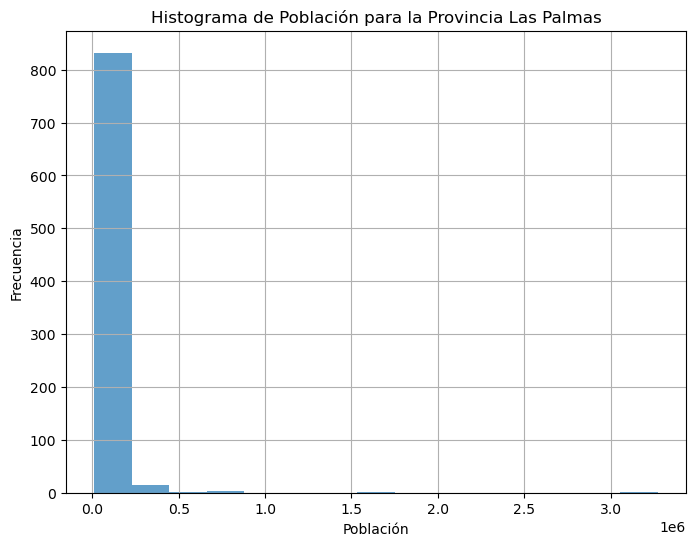

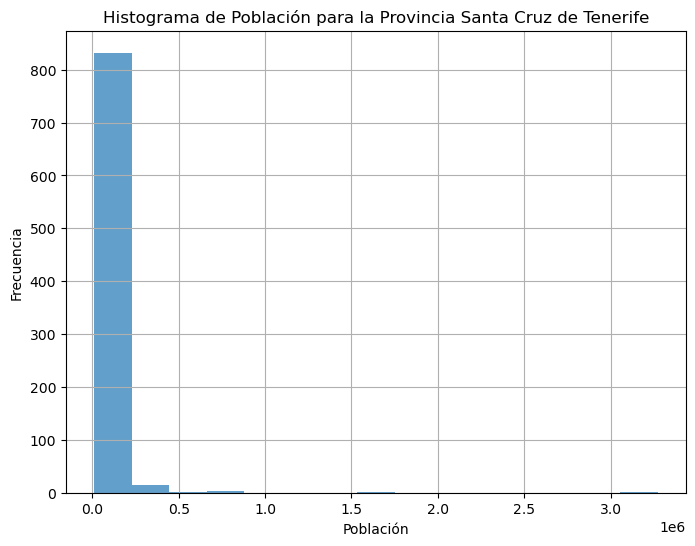

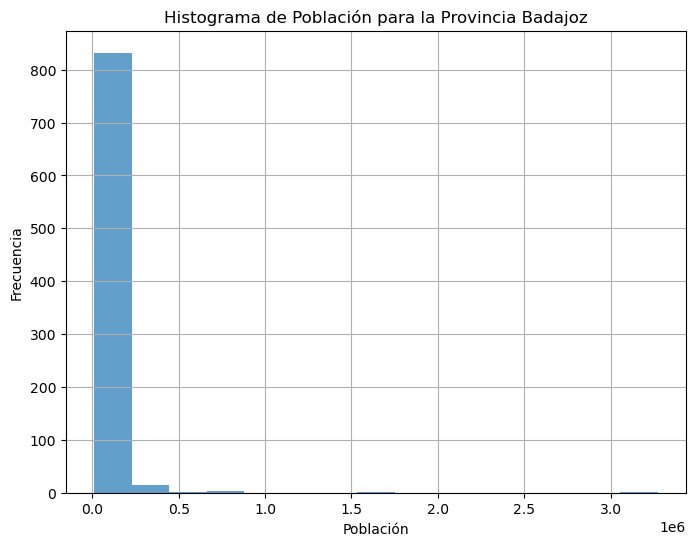

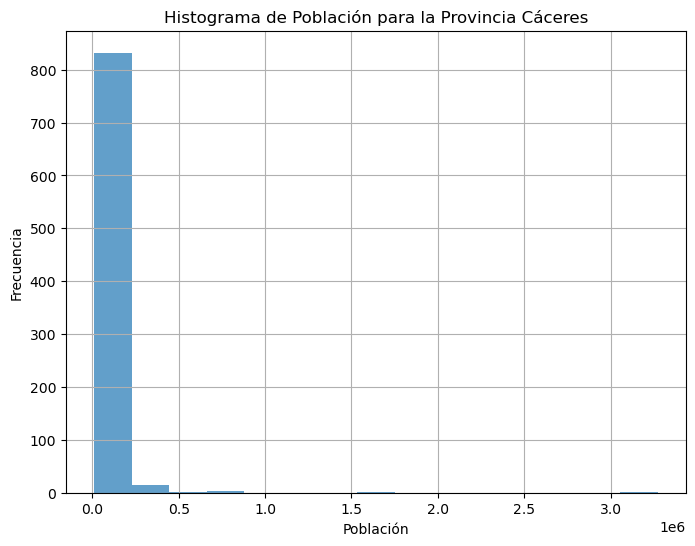

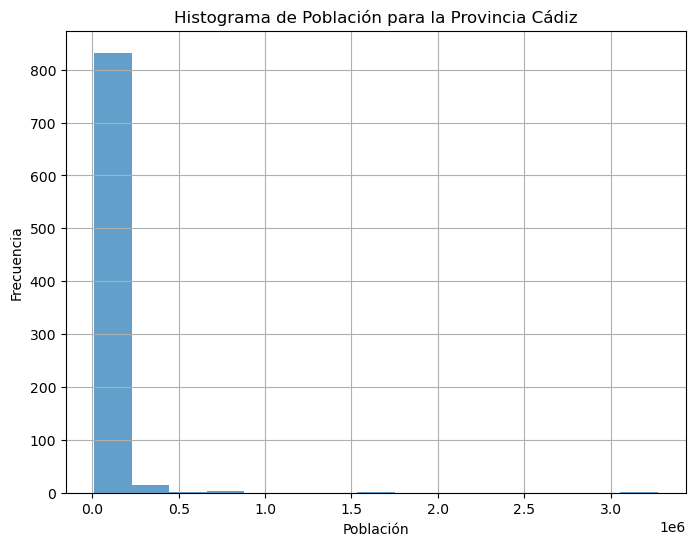

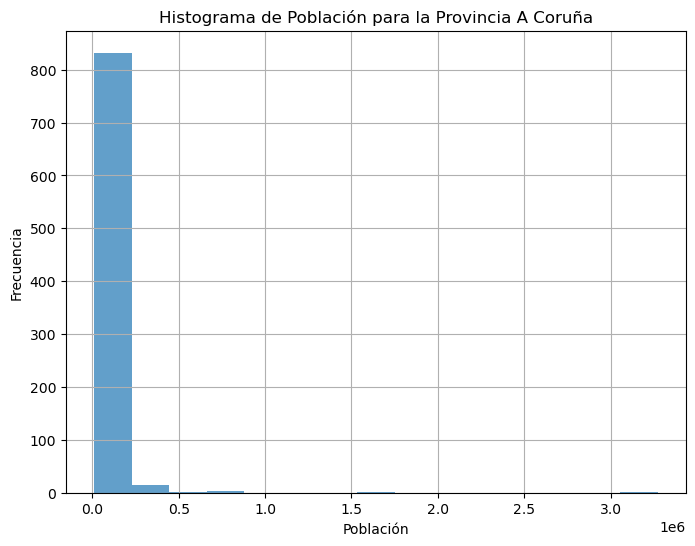

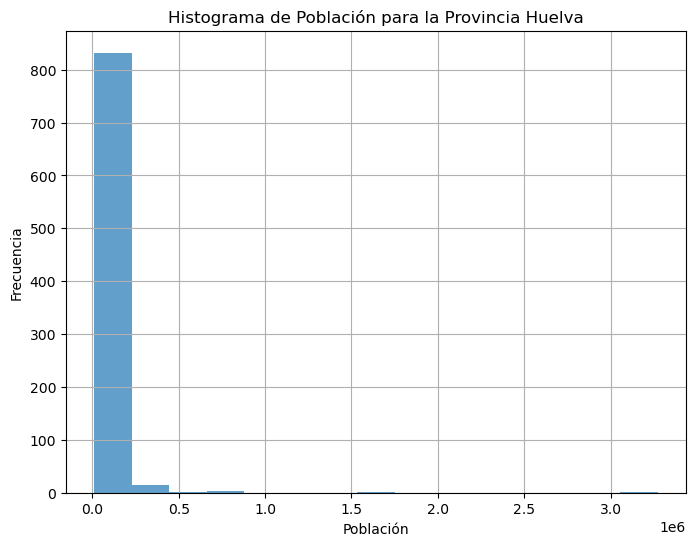

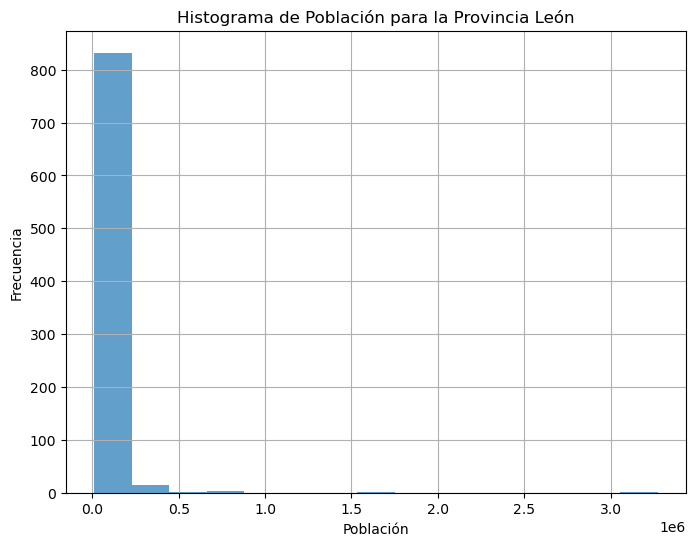

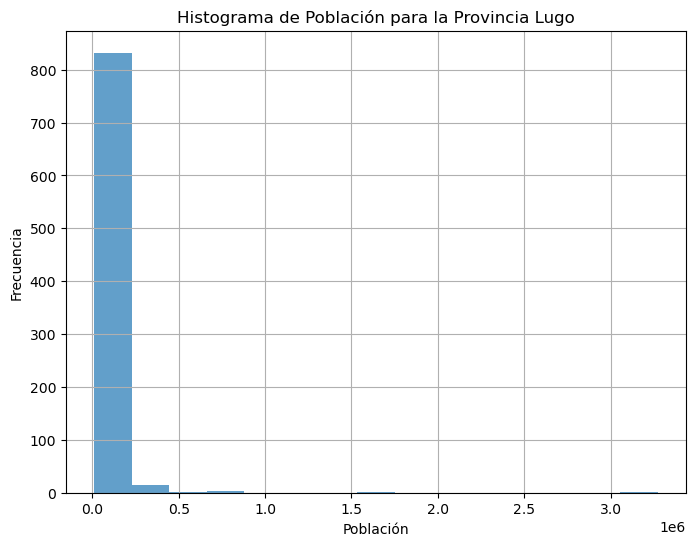

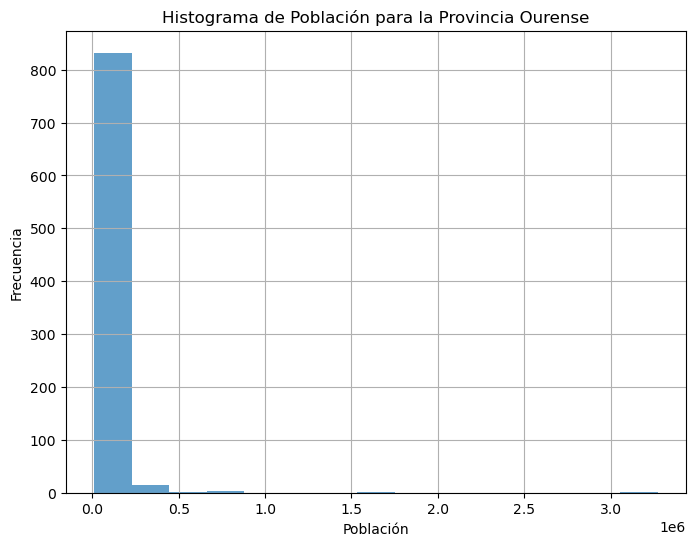

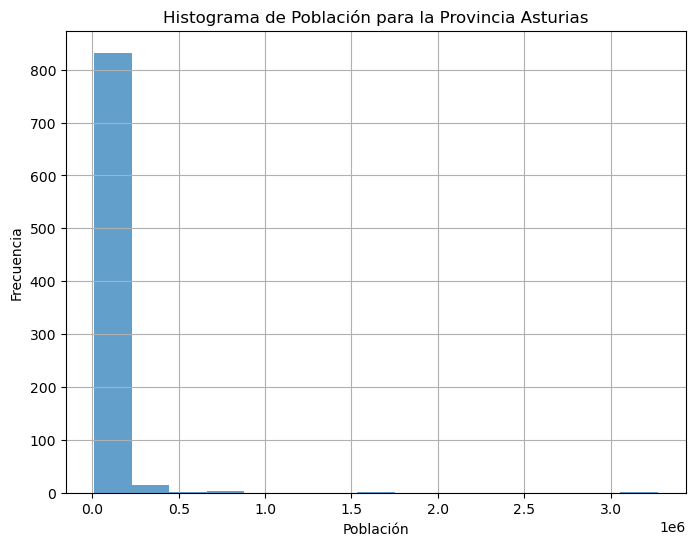

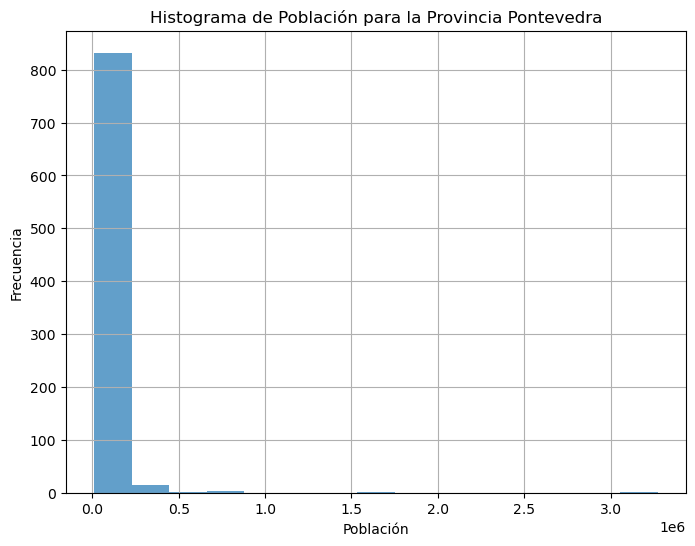

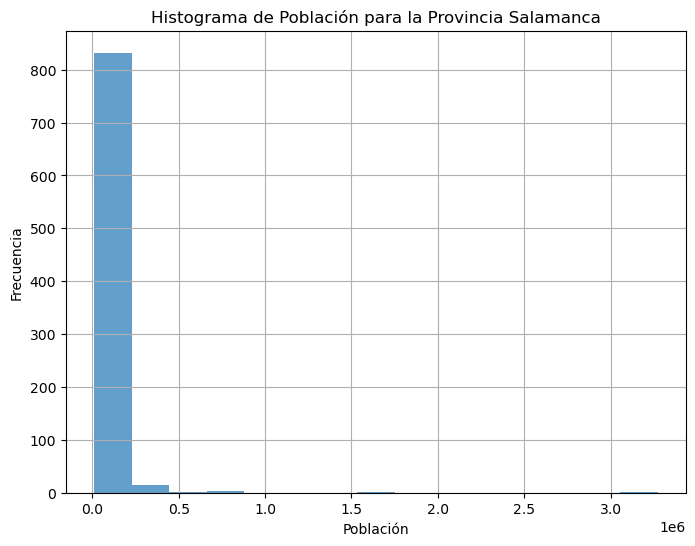

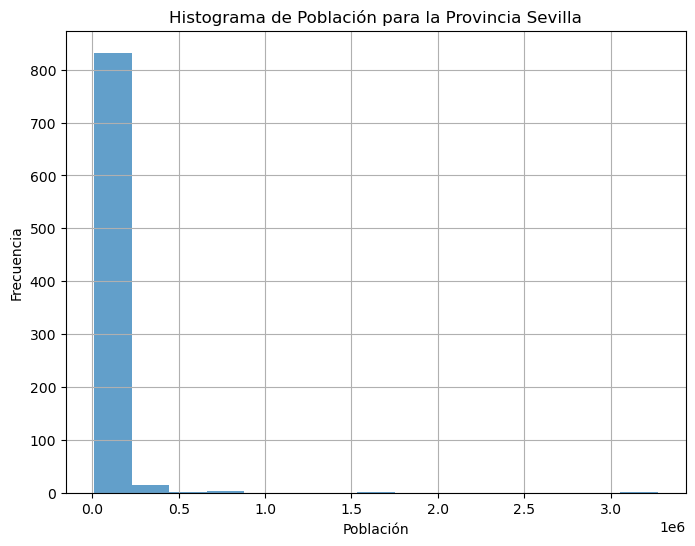

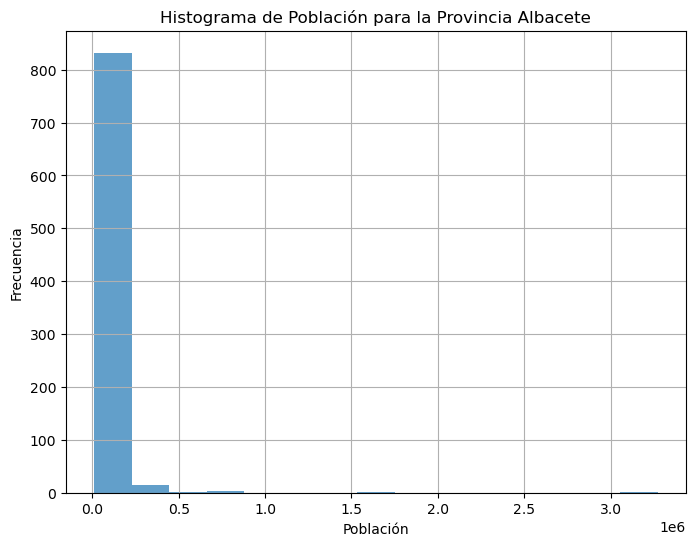

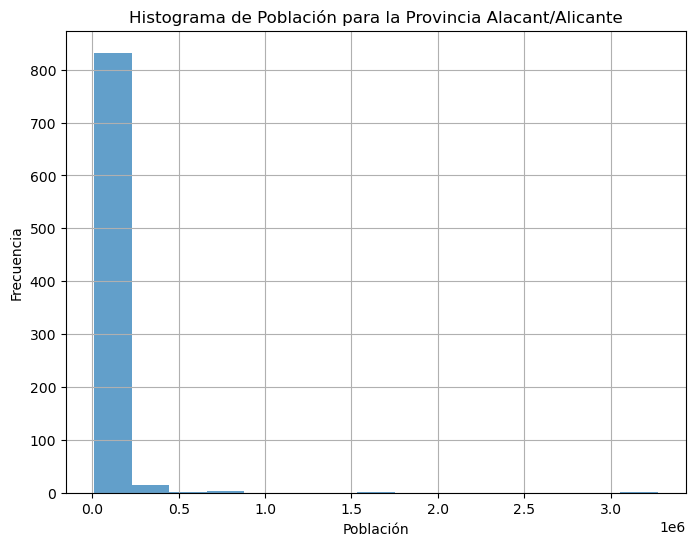

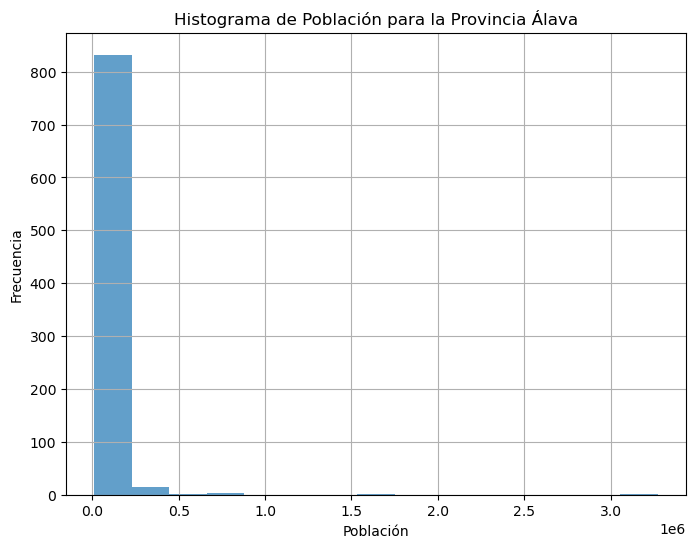

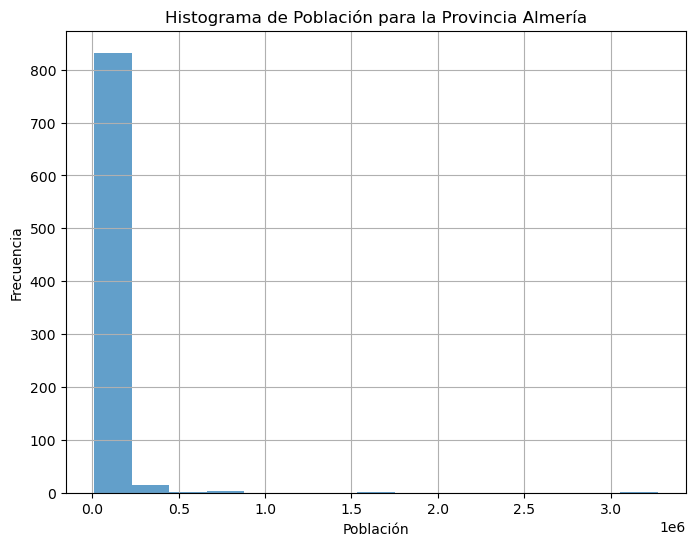

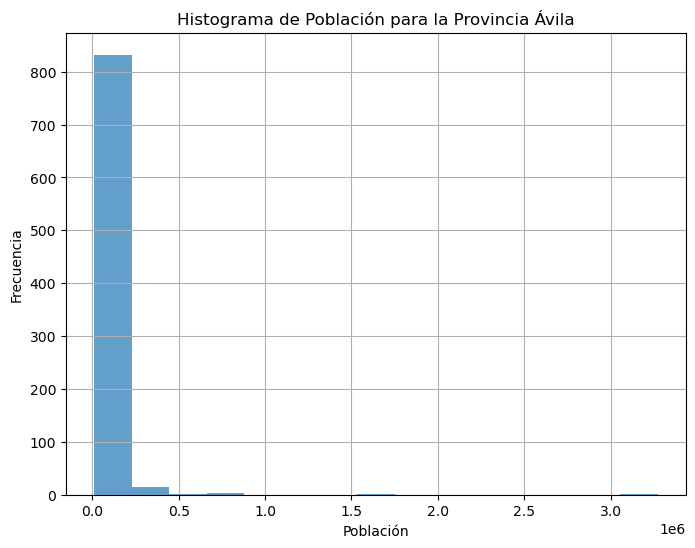

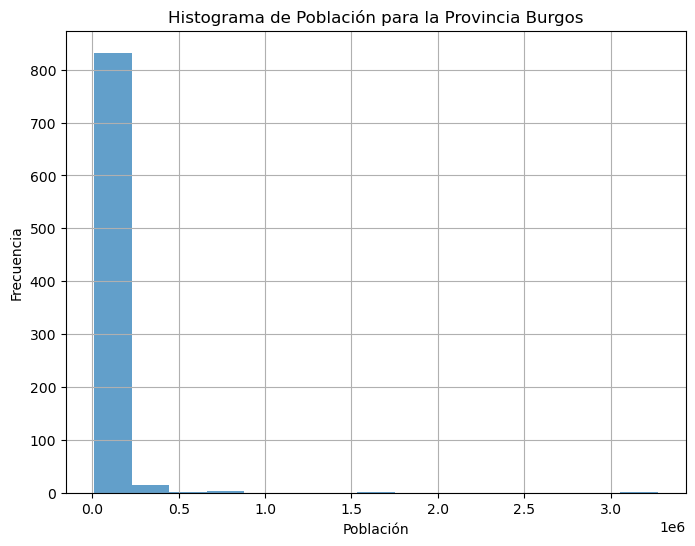

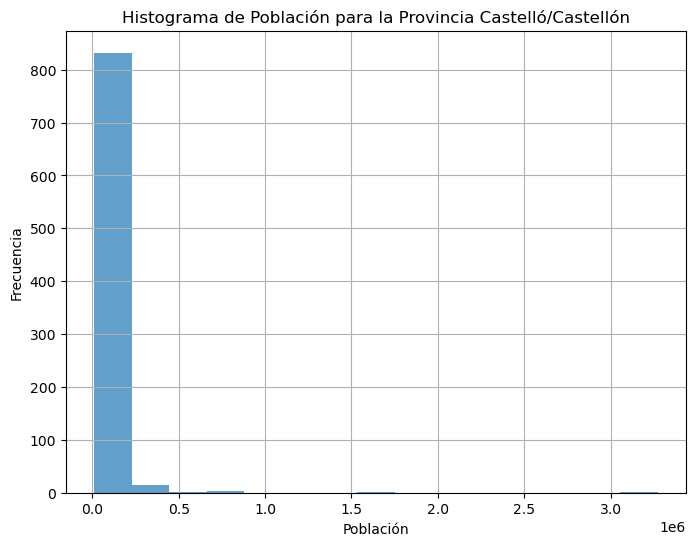

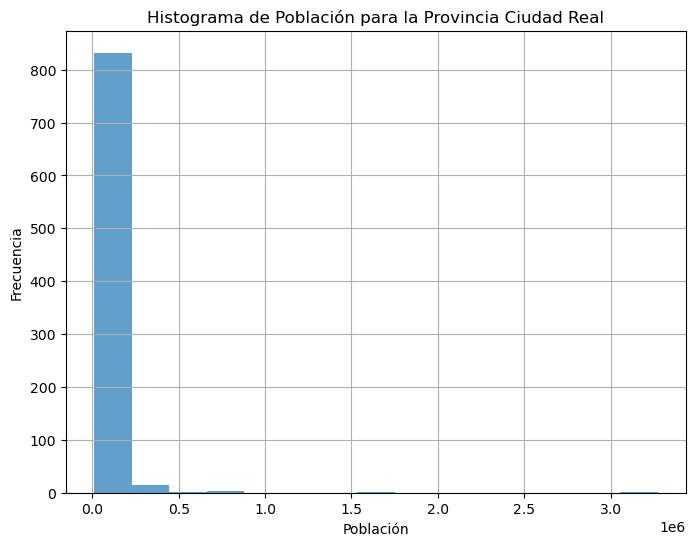

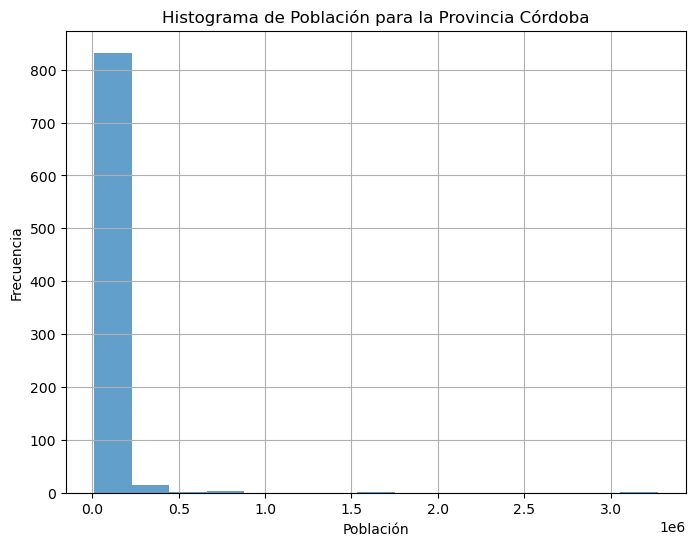

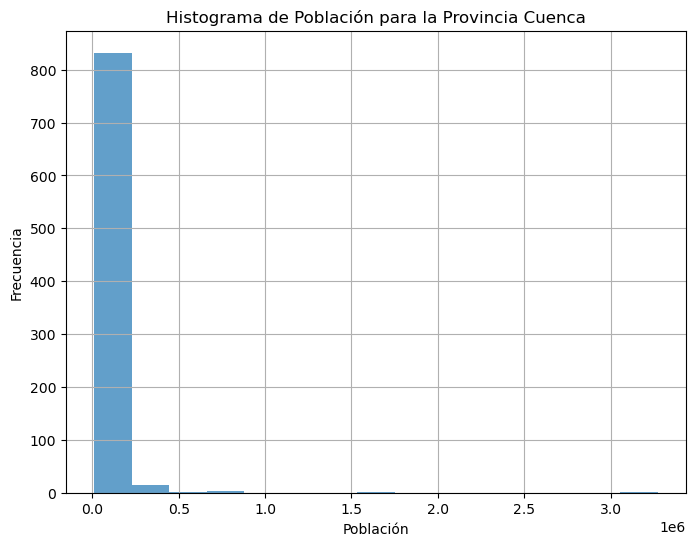

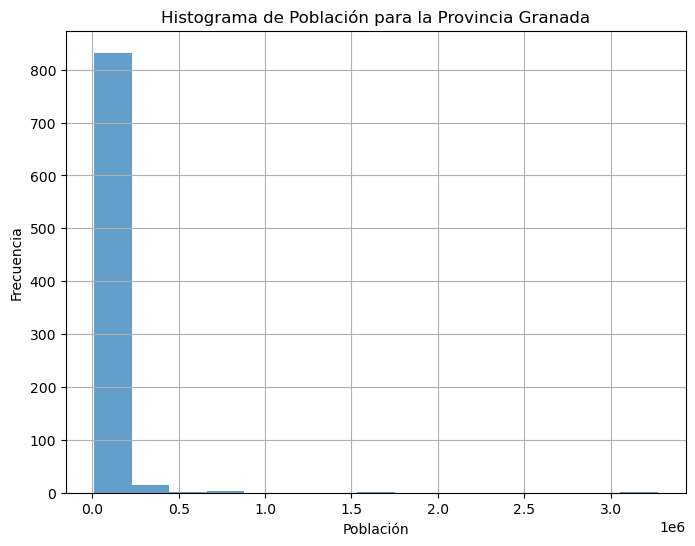

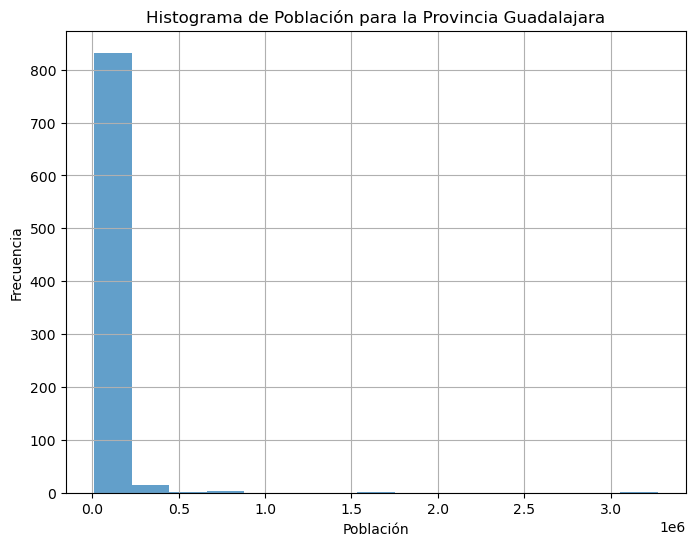

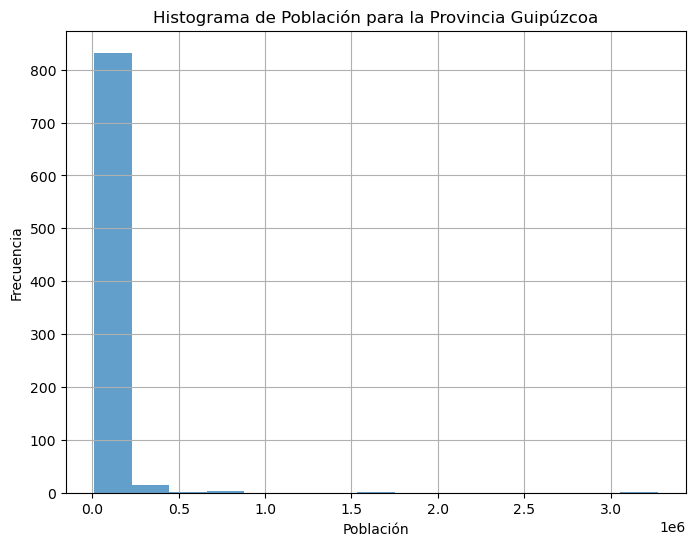

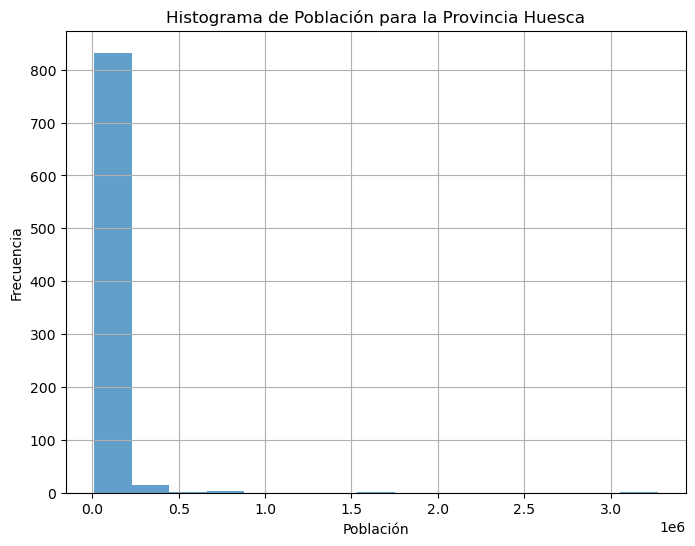

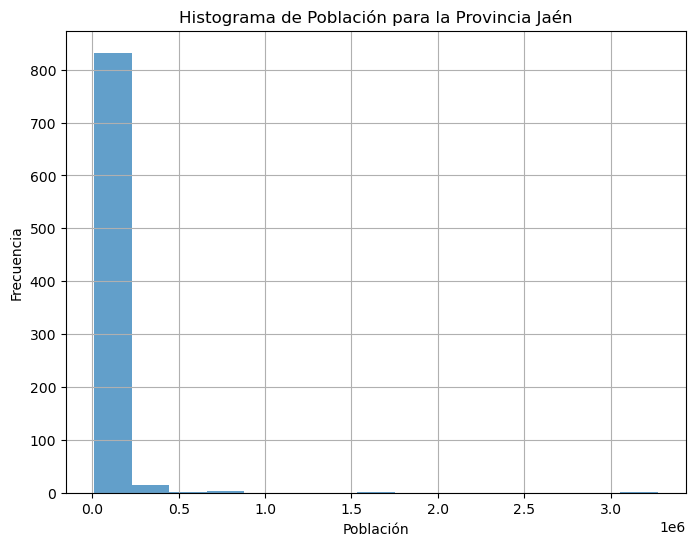

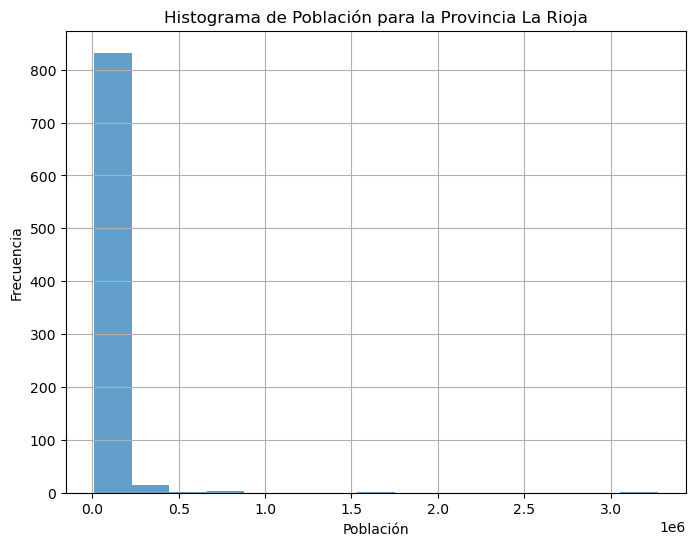

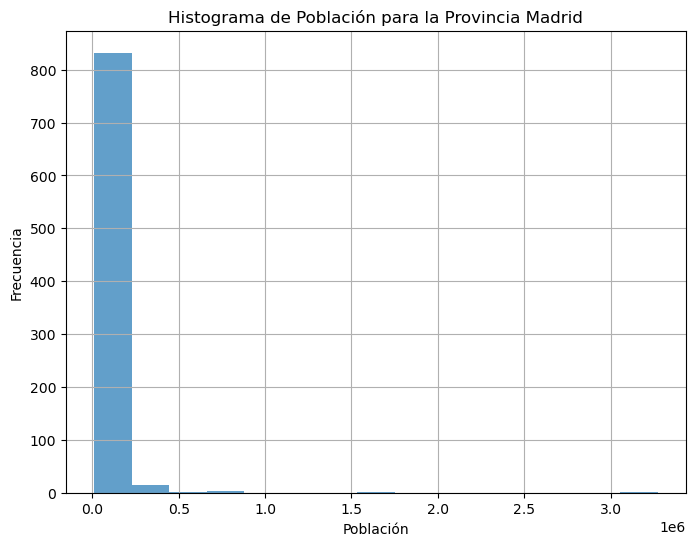

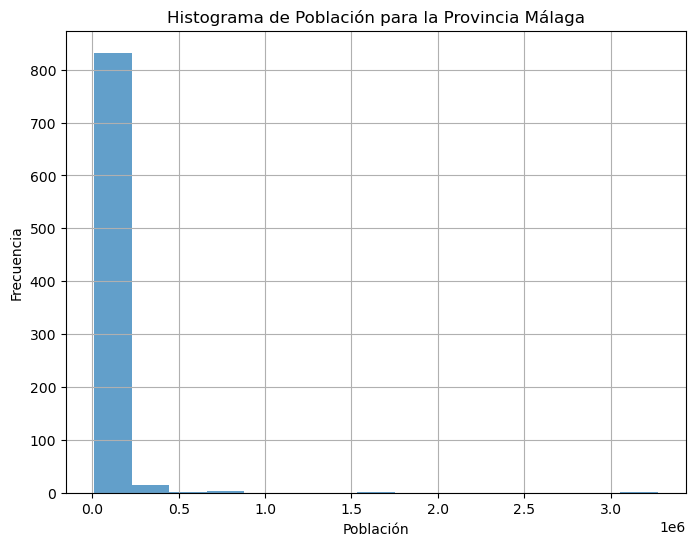

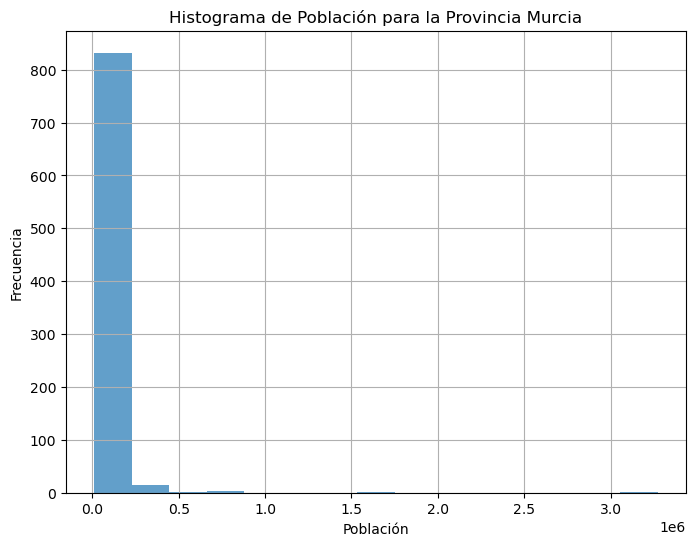

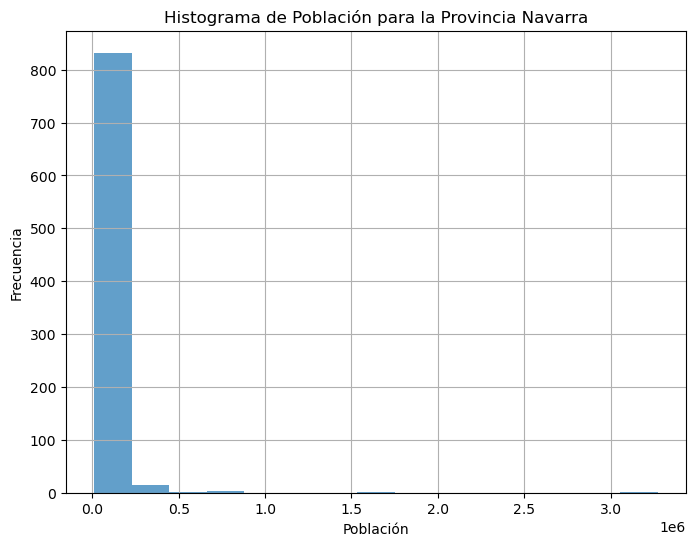

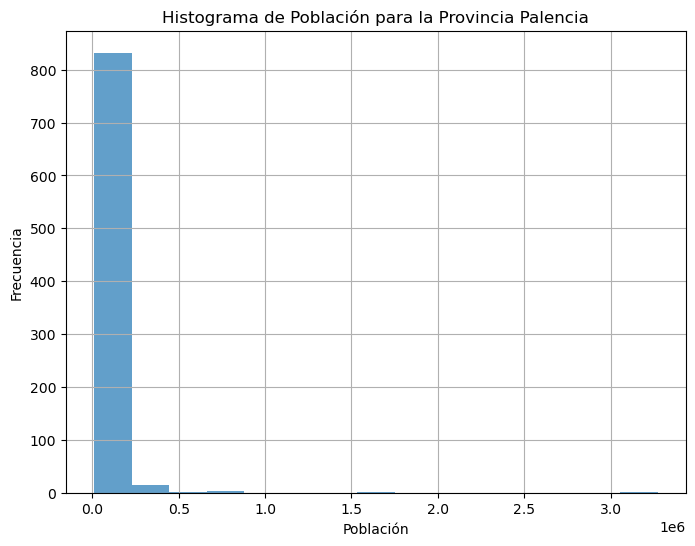

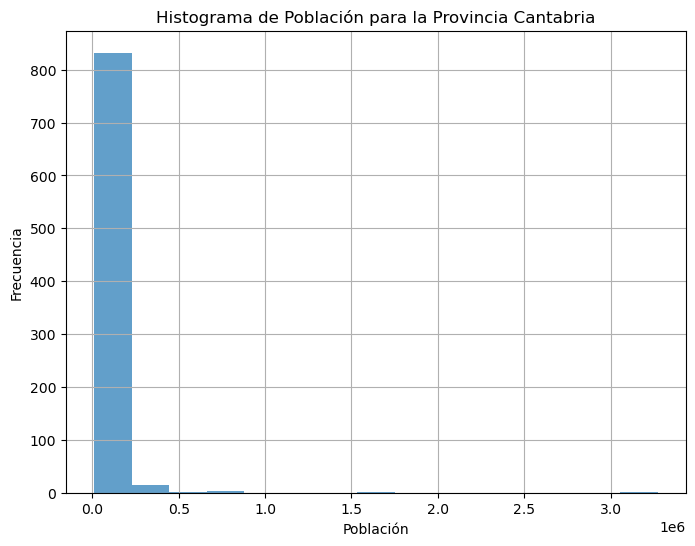

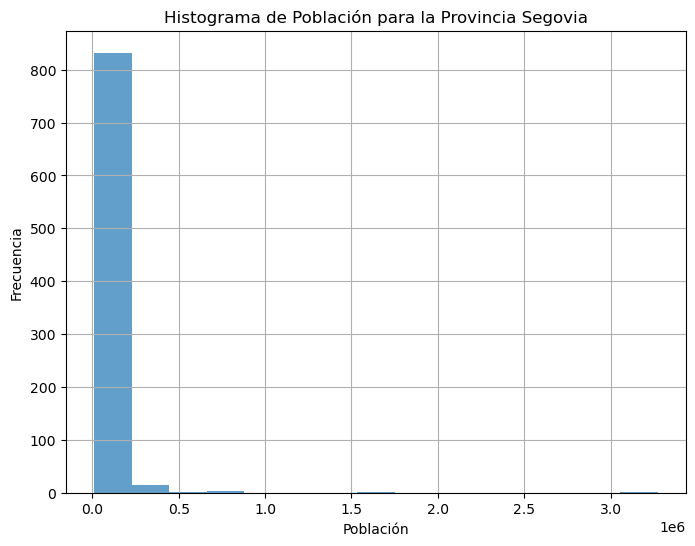

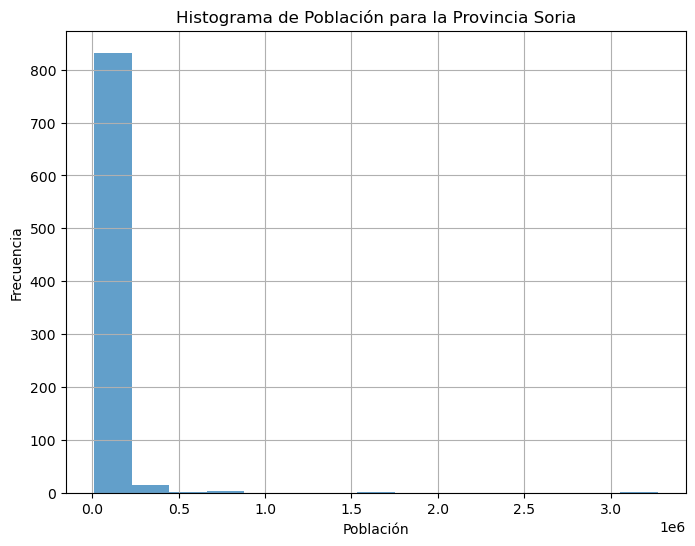

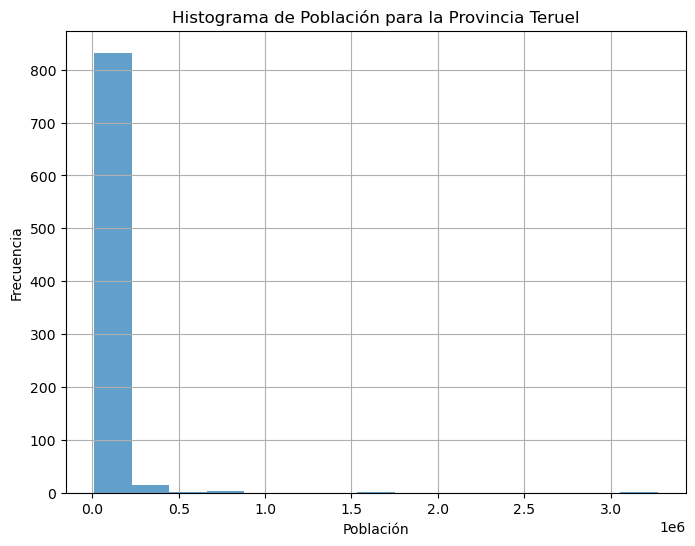

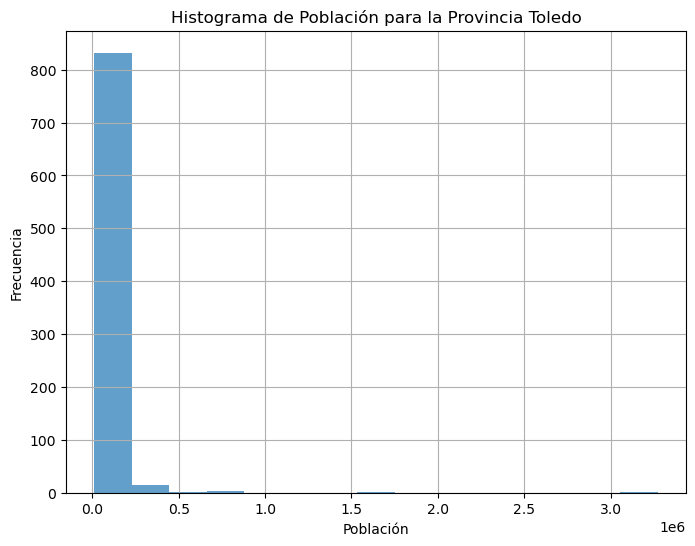

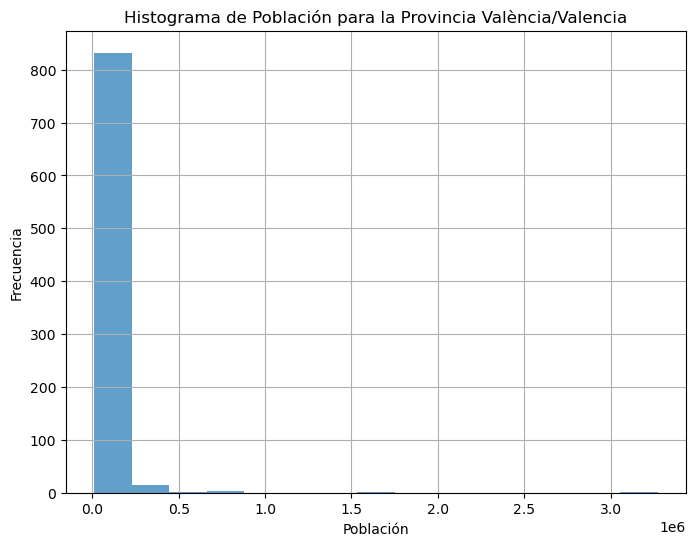

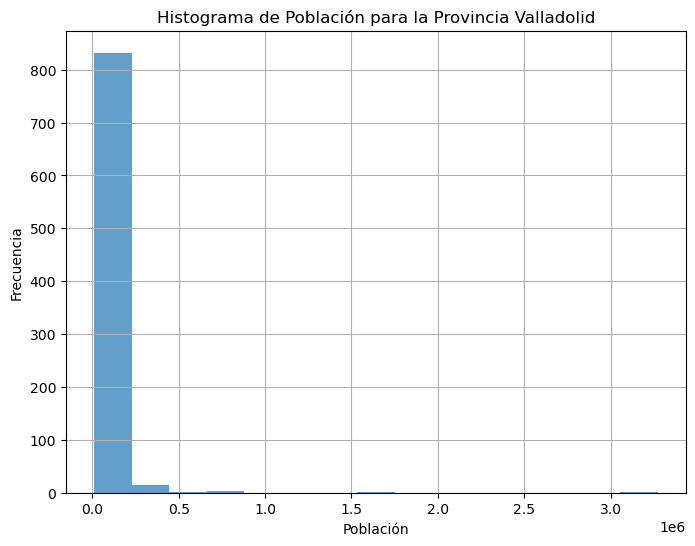

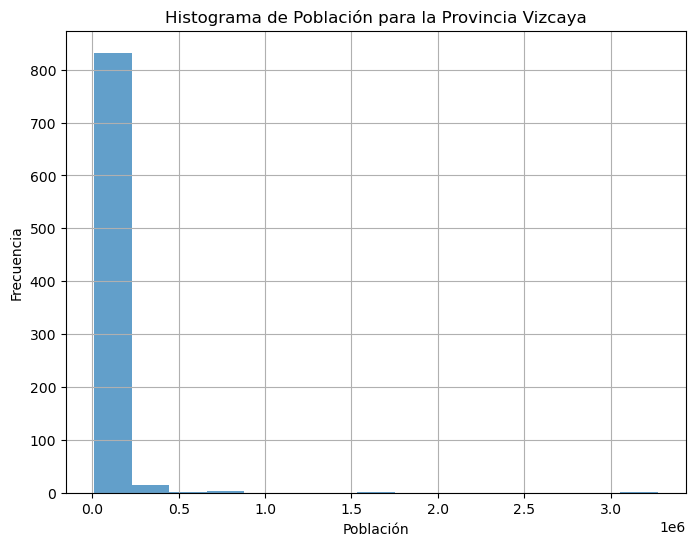

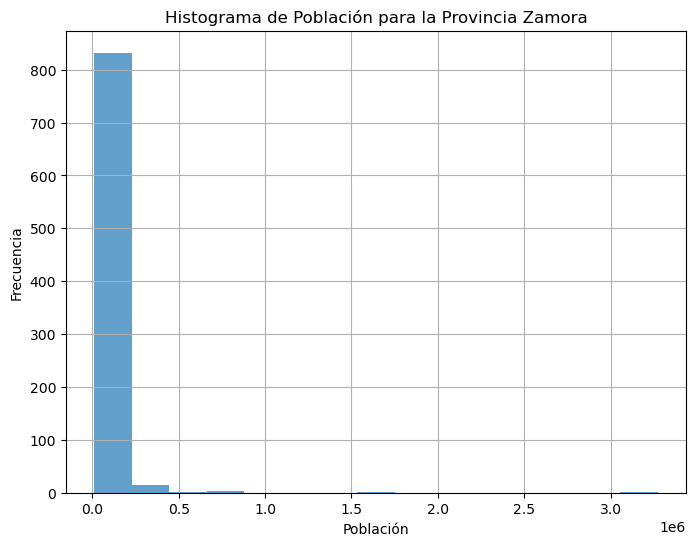

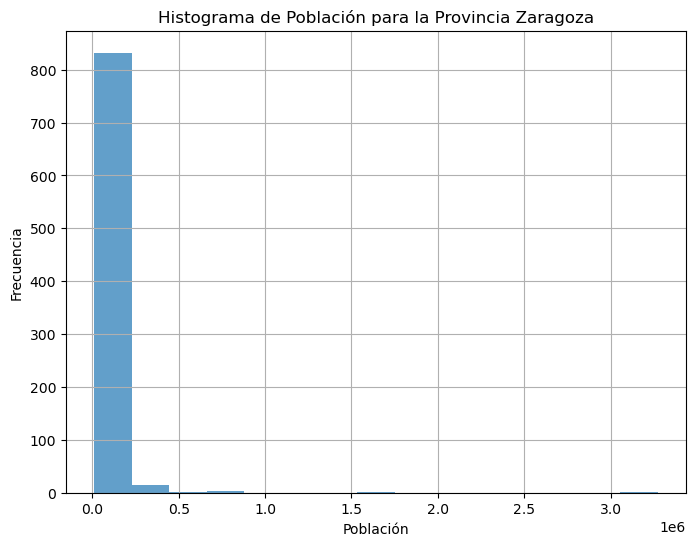

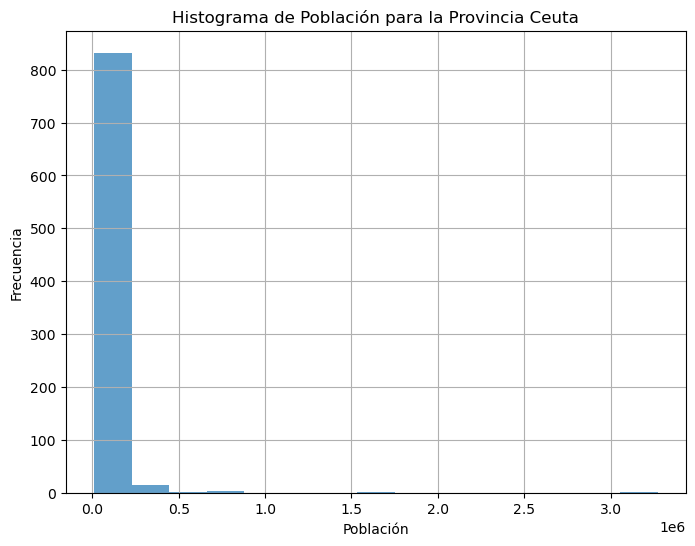

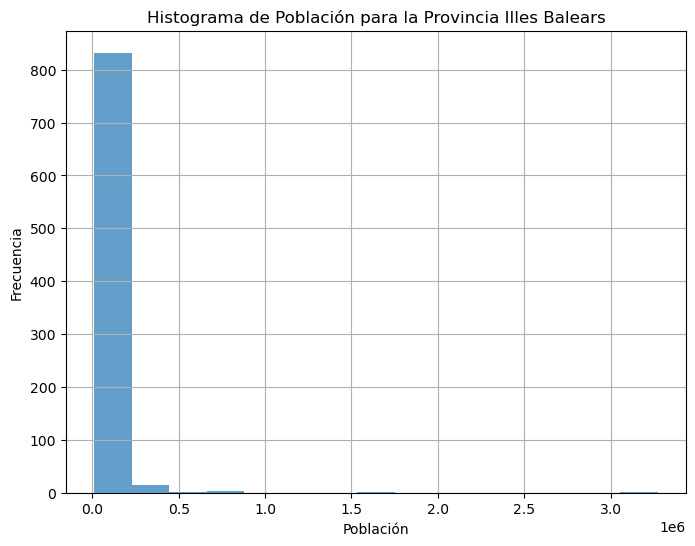

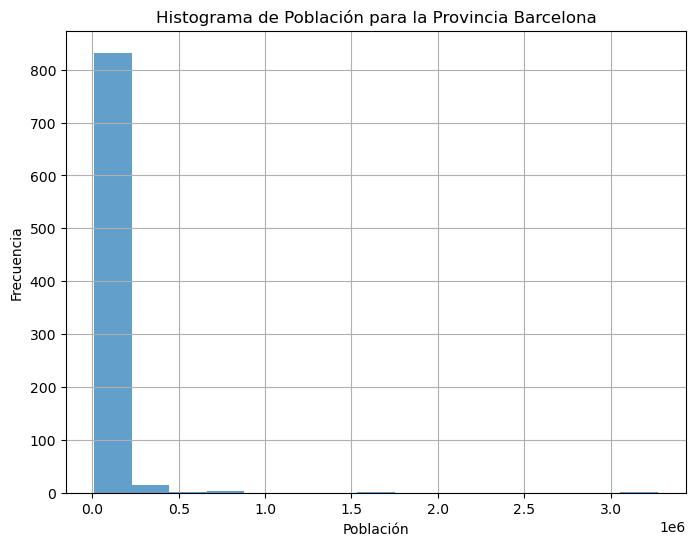

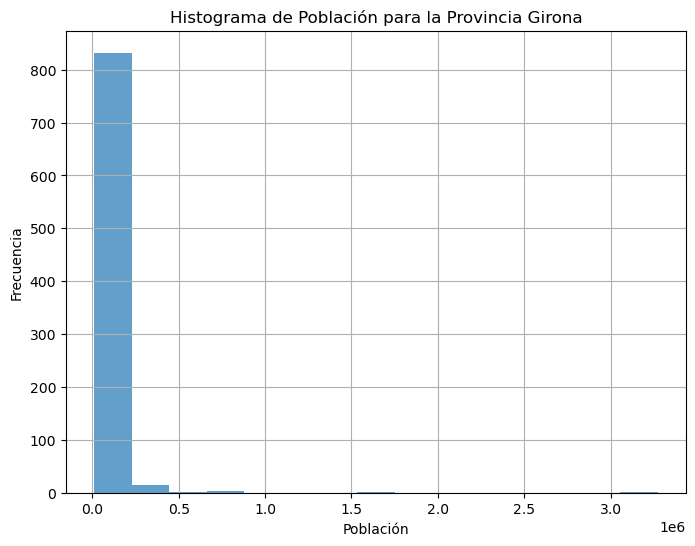

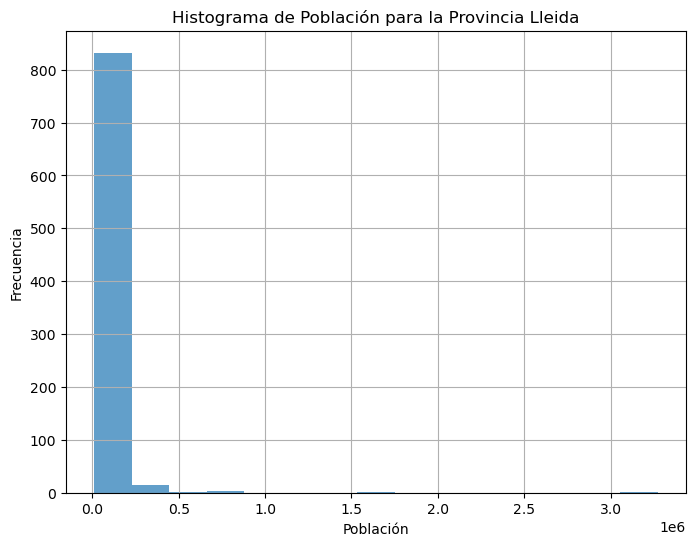

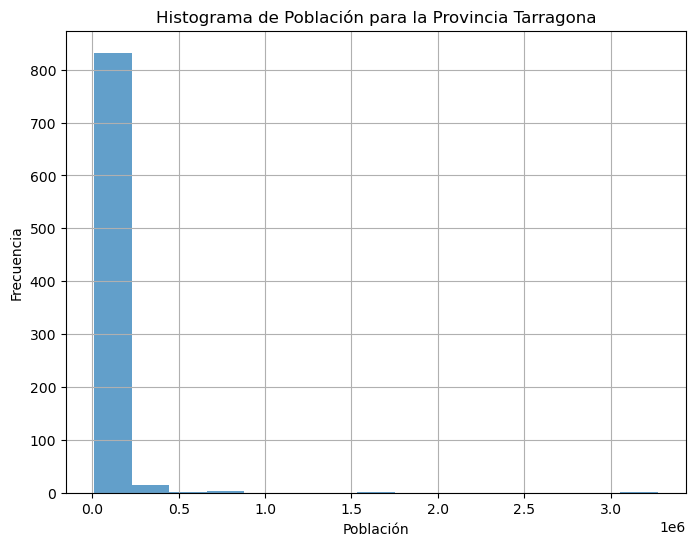

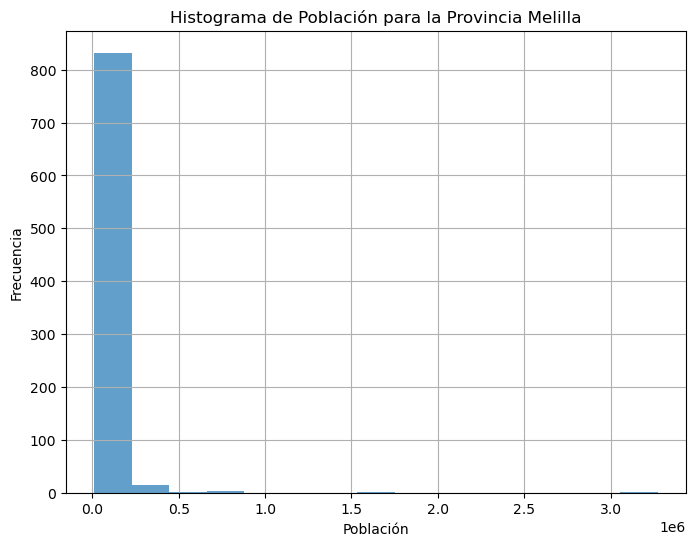

In [287]:
for provincia in pob_prov['Provincia'].unique():
    plt.figure(figsize=(8, 6))
    datos_provincia = pob_prov[pob_prov['Provincia'] == provincia]
    plt.hist(pob_prov['Poblacion'], bins=15, alpha=0.7)
    plt.title('Histograma de Población para la Provincia ' + provincia)
    plt.xlabel('Población')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

**7. Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?.**

In [ ]:
# Al momento de seleccionar los municipios
muni_random = dataframe['Texto'].sample(n=50, replace=False)
muni_select = dataframe[dataframe['Texto'].isin(muni_random)]

In [240]:
media = muni_select['Poblacion'].mean()
des_est = muni_select['Poblacion'].std()

print(f'La media es de :{media}')
print(f'La desviación estandar es de:{des_est}')

La media es de :56029.78431372549
La desviación estandar es de:134201.9944400699


**8. Determine los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero.**

In [284]:
madrid = dataframe[dataframe['Municipio']== 'Madrid']
pos_madrid = madrid[['X','Y']]

x = pos_madrid.iloc[0,0]
y = pos_madrid.iloc[0,1]

In [283]:
data_sin_madrid = dataframe[dataframe['Municipio'] != 'Madrid']
distancias = np.sqrt((data_sin_madrid['X'] - x)**2 + (data_sin_madrid['Y'] - y)**2)

cerca = distancias.idxmin()
lejos = distancias.idxmax()


print("El municipio más cercano a Madrid es:", data_sin_madrid.iloc[cerca,5])
print("El municipio más lejano a Madrid es:", data_sin_madrid.iloc[lejos,5])

El municipio más cercano a Madrid es: Rivas-Vaciamadrid
El municipio más lejano a Madrid es: Los Llanos de Aridane
